# Python Fundamentals - Day 3

## Using packages - random 

Before we begin our data analysis, let's experiment with random numbers.

The random package enables us to generate a single random number or a list of random numbers. To produce a random number within a specified range, we can use the `randrange()` function. This function requires two arguments: the starting point and the endpoint of the range, and it returns a random number from within that range.

It is recommended to set a seed for the random package at the start of your code, ensuring that you can consistently reproduce the same sequence of random numbers.

In [1]:
# first let us import the random package
from random import Random
# We can use a random seed to allow for a reproducible output of the random package
random = Random(10)

# then we can ask it to create a random number between 35 and 42
def give_temperature():
    return random.randrange(35, 42)

print(give_temperature())

39


## Detailed explanation (not explained in class)

To generate a list of random numbers, we can use the `random.sample()` function. This function requires the range as its first argument, for instance, `range(1, 101)`, and then the desired sample size, e.g., 15. This function is useful for expanding our list of participants.

After that, we can use `random.choice()` to select a single random element from the sample or list. In our scenario, it can be used to randomly choose a name and age.

In [2]:
dict_participants = {"Peter": 11, "Alex": 25, "Sandra": 43, "Eva":55, "Adam":66}

# Let us add some random extra participants out of a set of names and ages and add them to our list
names = ["Robin", "Willy", "Sam", "Nicky", "Marijn", "Dominique", "Luca", "Bo", "Jentje", "Jos", "Senna", "Jamie", "Ali", "Indy", "Dani", "Henny", "Ruth", "Eliza", "Jaimy"]
# Creates a list of 15 random numbers between 1 and 101
ages = random.sample(range(1, 101), 15)

p = 0
# While we do not have 40 participants yet...
while p < 40:
    # ...choose a random name of the list of names
    name = random.choice(names)
    # if we did not choose the name yet...
    if name not in dict_participants:
        # ...save the name in the dictionary together with a random age
        dict_participants[name] = random.choice(ages)
    # if we already have the name in the dictionary...
    else:
        # ...create a double name and save it in the dictionary with a random age
        name = random.choice(names) + "-" + random.choice(names)
        dict_participants[name] = random.choice(ages)
    p += 1

print(dict_participants)

{'Peter': 11, 'Alex': 25, 'Sandra': 43, 'Eva': 55, 'Adam': 66, 'Jamie': 5, 'Indy': 10, 'Marijn': 84, 'Ali-Indy': 2, 'Jentje': 63, 'Dominique': 21, 'Jos': 21, 'Marijn-Dani': 42, 'Bo': 63, 'Ali': 5, 'Jaimy': 5, 'Marijn-Luca': 32, 'Eliza-Jamie': 42, 'Senna-Eliza': 63, 'Henny-Sam': 62, 'Senna-Ruth': 62, 'Indy-Bo': 5, 'Willy': 63, 'Sam-Eliza': 32, 'Sam': 62, 'Jaimy-Jamie': 32, 'Nicky-Nicky': 63, 'Luca-Jamie': 60, 'Dani-Bo': 21, 'Marijn-Ruth': 62, 'Nicky': 2, 'Dani': 2, 'Dominique-Dominique': 63, 'Senna-Indy': 74, 'Robin': 36, 'Senna-Senna': 74, 'Jentje-Dani': 60, 'Dominique-Ali': 32, 'Henny': 21, 'Ruth-Jentje': 36, 'Dani-Ali': 62, 'Eliza-Jaimy': 27, 'Eliza': 60, 'Dominique-Eliza': 63}


Let's now use the list of participants and incorporate it into our function to determine their age group.

Once we've completed the checks, we want to export the results to a CSV file.

In [3]:
import csv 

def check_age(participants):
    # We open the file with the name participants.txt in a writing mode and with utf-8 encoding
    with open('output/participants_random.csv', mode = "w", encoding = 'utf-8') as file_out:
        writer = csv.writer(file_out)
        # header
        writer.writerow(["name", "age", "group", "temperature"])
        # for every participant
        for name, age in participants.items():
            if age > 65:
                group = "senior" 
            elif age < 18:
                group = "junior"
            else:
                group = "adult"
            writer.writerow([name, age, group, give_temperature()])

check_age(dict_participants)

## Use the output of random and create a new column in a csv file

Let's use the csv file `participants_random.csv` and add a new column to it with the output that our function generates.

To do that, we use need to import csv again.

In [4]:
import csv 

# Define function
def add_temp_to_csv():
    """Function reads in existing csv file and adds a new column temperature"""
    # Open file to read
    with open('static/participants_random.csv', mode = "r", encoding = 'utf-8', newline='') as file_in:
        # Create a csv reader
        reader = csv.reader(file_in)
        # Open file to write in
        with open('output/participants_long.csv', mode = "w", encoding = 'utf-8', newline='') as file_out:
            # Create a csv writer
            writer = csv.writer(file_out)
            # for every row that we read in participants_random.csv...
            for row in reader:
                # if the row contains the words "name" and "age" (i.e., it contains headers)...
                if "name" in row and "age" in row:
                    # ...add the new column header
                    writer.writerow(row + ["temperature"])
                # else (if it is not the header)... 
                else:
                    # ...add the temperature
                    writer.writerow(row + [give_temperature()])

add_temp_to_csv()

Our csv file will now include all the information that we just created using the random package.

```csv
name,age,group,temperature
Peter,11,junior,37
Alex,25,adult,41
Sandra,43,adult,35
Eva,55,adult,38
Adam,66,senior,39
Marijn,7,junior,41
Indy,78,senior,38
Ruth,63,adult,35
Dani,69,senior,37
Jentje,63,adult,41
Indy-Senna,20,adult,36
Ruth-Marijn,14,junior,38
Bo,69,senior,36
Willy,20,adult,36
Luca,20,adult,38
Jaimy,12,junior,41
Henny,13,junior,41
Nicky,57,adult,38
Bo-Jos,63,adult,41
Sam,13,junior,37
Eliza,78,senior,35
Jos-Dominique,20,adult,36
Marijn-Jamie,12,junior,41
Ali,63,adult,36
Jamie-Dominique,54,adult,39
Luca-Indy,1,junior,40
Jos-Dani,14,junior,38
Indy-Dani,20,adult,36
Luca-Jentje,12,junior,39
Jamie,54,adult,40
Robin,1,junior,40
Indy-Ali,59,adult,38
Sam-Indy,78,senior,35
Willy-Jamie,57,adult,38
Dani-Indy,78,senior,41
Jos,45,adult,35
Ruth-Jentje,9,junior,36
Senna-Jamie,14,junior,35
Henny-Dani,59,adult,38
Jaimy-Henny,54,adult,40
Jamie-Ali,63,adult,40
Dominique,12,junior,37
Jaimy-Sam,12,junior,40
Robin-Jaimy,69,senior,37
```

## Using Packages - Pandas
Once we have prepared the data for our statistical analysis, we can start using another package: pandas.

Pandas is a fast, powerful, flexible, and user-friendly open-source tool for data analysis and manipulation, built on top of the Python programming language.

With pandas, we can read files, process them, and perform statistical analyses on the data. But to begin, we need to import pandas.

Note that, unlike other packages we've seen before, pandas is *not* in Python's standard library.
This means that it has to be installed in your environment before you can use it. For our course, though, this has been done for you already.

In [5]:
import pandas

After importing pandas, we can use the function `read_csv()` to read our list of participants. We give the name of the csv file and the data type (in this case: string) as arguments.

In [6]:
data = pandas.read_csv("static/participants_long.csv",dtype=str)
print(data)

               name age   group temperature
0             Peter  11  junior          37
1              Alex  25   adult          41
2            Sandra  43   adult          35
3               Eva  55   adult          38
4              Adam  66  senior          39
5            Marijn   7  junior          41
6              Indy  78  senior          38
7              Ruth  63   adult          35
8              Dani  69  senior          37
9            Jentje  63   adult          41
10       Indy-Senna  20   adult          36
11      Ruth-Marijn  14  junior          38
12               Bo  69  senior          36
13            Willy  20   adult          36
14             Luca  20   adult          38
15            Jaimy  12  junior          41
16            Henny  13  junior          41
17            Nicky  57   adult          38
18           Bo-Jos  63   adult          41
19              Sam  13  junior          37
20            Eliza  78  senior          35
21    Jos-Dominique  20   adult 

Given that we cannot assume the use of a single data type, we can specify the data types for each column. To achieve this, we create a dictionary named `d_type` and fill it it with the column names and their data types.

In [7]:
dtype = {"name": str, "age": int, "group": str, "temperature":int}
data = pandas.read_csv("static/participants_long.csv",dtype=dtype)
print(data)

               name  age   group  temperature
0             Peter   11  junior           37
1              Alex   25   adult           41
2            Sandra   43   adult           35
3               Eva   55   adult           38
4              Adam   66  senior           39
5            Marijn    7  junior           41
6              Indy   78  senior           38
7              Ruth   63   adult           35
8              Dani   69  senior           37
9            Jentje   63   adult           41
10       Indy-Senna   20   adult           36
11      Ruth-Marijn   14  junior           38
12               Bo   69  senior           36
13            Willy   20   adult           36
14             Luca   20   adult           38
15            Jaimy   12  junior           41
16            Henny   13  junior           41
17            Nicky   57   adult           38
18           Bo-Jos   63   adult           41
19              Sam   13  junior           37
20            Eliza   78  senior  

After importing the data, we can examine it by viewing the first five entries using `head()`and the last five entries using `tail()`.

In [8]:
print(data.head())

     name  age   group  temperature
0   Peter   11  junior           37
1    Alex   25   adult           41
2  Sandra   43   adult           35
3     Eva   55   adult           38
4    Adam   66  senior           39


In [9]:
print(data.tail())

           name  age   group  temperature
39  Jaimy-Henny   54   adult           40
40    Jamie-Ali   63   adult           40
41    Dominique   12  junior           37
42    Jaimy-Sam   12  junior           40
43  Robin-Jaimy   69  senior           37


We can also display the column names using `data.columns` or look at potential row names using `data.index`.

In [10]:
print(data.columns)

Index(['name', 'age', 'group', 'temperature'], dtype='object')


In [11]:
print(data.index)

RangeIndex(start=0, stop=44, step=1)


We can also obtain a quick statistical summary of the data using `describe()`.

For string data, this provides information on the number of rows (count), the number of unique items (unique), the most common item (top), and its frequency (freq).

For integer data, `describe()` gives us the number of rows (count), the mean, the standard deviation (std), the smallest value (min), the 1st, 2nd, and 3rd quartiles (25%, 50%, and 75%), and the maximum value (max).

In [12]:
print(data.describe())

             age  temperature
count  44.000000    44.000000
mean   39.068182    38.045455
std    26.100341     2.079295
min     1.000000    35.000000
25%    13.000000    36.000000
50%    44.000000    38.000000
75%    63.000000    40.000000
max    78.000000    41.000000


We can use `sort_index()` to sort the data by rows or by column name (using data.sort_index(axis = 1)).

In [13]:
print(data.sort_index())

               name  age   group  temperature
0             Peter   11  junior           37
1              Alex   25   adult           41
2            Sandra   43   adult           35
3               Eva   55   adult           38
4              Adam   66  senior           39
5            Marijn    7  junior           41
6              Indy   78  senior           38
7              Ruth   63   adult           35
8              Dani   69  senior           37
9            Jentje   63   adult           41
10       Indy-Senna   20   adult           36
11      Ruth-Marijn   14  junior           38
12               Bo   69  senior           36
13            Willy   20   adult           36
14             Luca   20   adult           38
15            Jaimy   12  junior           41
16            Henny   13  junior           41
17            Nicky   57   adult           38
18           Bo-Jos   63   adult           41
19              Sam   13  junior           37
20            Eliza   78  senior  

We can also sort the data by a specific column, such as age. Setting ascending=False allows us to arrange the data in descending order.

In [14]:
print(data.sort_values(by = 'age', ascending=False))

               name  age   group  temperature
34        Dani-Indy   78  senior           41
32         Sam-Indy   78  senior           35
6              Indy   78  senior           38
20            Eliza   78  senior           35
43      Robin-Jaimy   69  senior           37
12               Bo   69  senior           36
8              Dani   69  senior           37
4              Adam   66  senior           39
40        Jamie-Ali   63   adult           40
23              Ali   63   adult           36
18           Bo-Jos   63   adult           41
7              Ruth   63   adult           35
9            Jentje   63   adult           41
31         Indy-Ali   59   adult           38
38       Henny-Dani   59   adult           38
33      Willy-Jamie   57   adult           38
17            Nicky   57   adult           38
3               Eva   55   adult           38
24  Jamie-Dominique   54   adult           39
29            Jamie   54   adult           40
39      Jaimy-Henny   54   adult  

### Selection of specific columns or items

We can also examine the statistical summary of a single column. To do this, we simply use the column name after the dot.

For example, `print(data.age)` prints the 'age' column.

We can also combine this with `describe()` to obtain detailed information about a specific column.

In [15]:
print(data.age.describe())

count    44.000000
mean     39.068182
std      26.100341
min       1.000000
25%      13.000000
50%      44.000000
75%      63.000000
max      78.000000
Name: age, dtype: float64


By using the column name and the index, we can access individual rows or a sequence of rows, similar to accessing elements within a list or characters in a string.

In [16]:
# return the first row of the column age
print("First row:", data.age[0])
# return the sequence between the first row of the column age and the third row
print("Sequence:")
print(data.age[0:3])

First row: 11
Sequence:
0    11
1    25
2    43
Name: age, dtype: int64


You can also request specific properties of a value using boolean indexing. 

This approach uses logic similar to the conditions used in an 'if' statement.
The important distinction is that we apply this condition to *all* of the rows
at once.

In [17]:
# Only look at the data in which the age is above 40
print(data[data["age"] > 40])

               name  age   group  temperature
2            Sandra   43   adult           35
3               Eva   55   adult           38
4              Adam   66  senior           39
6              Indy   78  senior           38
7              Ruth   63   adult           35
8              Dani   69  senior           37
9            Jentje   63   adult           41
12               Bo   69  senior           36
17            Nicky   57   adult           38
18           Bo-Jos   63   adult           41
20            Eliza   78  senior           35
23              Ali   63   adult           36
24  Jamie-Dominique   54   adult           39
29            Jamie   54   adult           40
31         Indy-Ali   59   adult           38
32         Sam-Indy   78  senior           35
33      Willy-Jamie   57   adult           38
34        Dani-Indy   78  senior           41
35              Jos   45   adult           35
38       Henny-Dani   59   adult           38
39      Jaimy-Henny   54   adult  

The function `isin()` allows us to only access values that are in a certain list or group.

In [18]:
data[data["name"].isin(["Ali", "Adam"])]

,name,age,group,temperature
4,Adam,66,senior,39
23,Ali,63,adult,36


Based on these conditions, we can also create a new column. In this example, we create a new column named 'attended' that contains the value True if the participant is older than 40.

In [19]:
data['attended'] = data['age'] > 40
print(data)

               name  age   group  temperature  attended
0             Peter   11  junior           37     False
1              Alex   25   adult           41     False
2            Sandra   43   adult           35      True
3               Eva   55   adult           38      True
4              Adam   66  senior           39      True
5            Marijn    7  junior           41     False
6              Indy   78  senior           38      True
7              Ruth   63   adult           35      True
8              Dani   69  senior           37      True
9            Jentje   63   adult           41      True
10       Indy-Senna   20   adult           36     False
11      Ruth-Marijn   14  junior           38     False
12               Bo   69  senior           36      True
13            Willy   20   adult           36     False
14             Luca   20   adult           38     False
15            Jaimy   12  junior           41     False
16            Henny   13  junior           41   

### Groups

With Pandas, you can split the data into groups based on specific criteria, apply a function to each group independently, and then combine the results into a single data structure.

Let's create groups for the age categories: adult, junior, and senior, as we have defined.


In [20]:
age_groups = data.groupby("group")

We can now use the function `describe()` to access the statistics based on the groups

In [21]:
age_groups.describe()

age                                                     temperature  \
       count       mean        std   min   25%   50%   75%   max       count   
group                                                                          
adult   21.0  46.523810  17.497483  20.0  25.0  54.0  59.0  63.0        21.0   
junior  15.0  10.466667   4.273952   1.0  10.0  12.0  13.0  14.0        15.0   
senior   8.0  73.125000   5.303301  66.0  69.0  73.5  78.0  78.0         8.0   

                                                             
             mean       std   min    25%   50%    75%   max  
group                                                        
adult   37.857143  2.080522  35.0  36.00  38.0  40.00  41.0  
junior  38.733333  2.016598  35.0  37.00  39.0  40.50  41.0  
senior  37.250000  2.052873  35.0  35.75  37.0  38.25  41.0

This also works in combination with specific columns.

In [22]:
age_groups.age.describe()

,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
adult,21.0,46.523810,17.497483,20.0,25.0,54.0,59.0,63.0
junior,15.0,10.466667,4.273952,1.0,10.0,12.0,13.0,14.0
senior,8.0,73.125000,5.303301,66.0,69.0,73.5,78.0,78.0


### Simple Statistics

With Pandas, you can count the occurrences of specific columns or values. The `count()` function counts all non-empty cells for each column or row.

In [23]:
# Count each filled row per column
data.count()

# Count each filled column per row
data.count(1)

0     5
1     5
2     5
3     5
4     5
5     5
6     5
7     5
8     5
9     5
10    5
11    5
12    5
13    5
14    5
15    5
16    5
17    5
18    5
19    5
20    5
21    5
22    5
23    5
24    5
25    5
26    5
27    5
28    5
29    5
30    5
31    5
32    5
33    5
34    5
35    5
36    5
37    5
38    5
39    5
40    5
41    5
42    5
43    5
dtype: int64

You can also count values (or combinations) using `value_counts()`.

In [24]:
data.value_counts()

name             age  group   temperature  attended
Adam             66   senior  39           True        1
Alex             25   adult   41           False       1
Jos-Dani         14   junior  38           False       1
Jos-Dominique    20   adult   36           False       1
Luca             20   adult   38           False       1
Luca-Indy        1    junior  40           False       1
Luca-Jentje      12   junior  39           False       1
Marijn           7    junior  41           False       1
Marijn-Jamie     12   junior  41           False       1
Nicky            57   adult   38           True        1
Peter            11   junior  37           False       1
Robin            1    junior  40           False       1
Robin-Jaimy      69   senior  37           True        1
Ruth             63   adult   35           True        1
Ruth-Jentje      9    junior  36           False       1
Ruth-Marijn      14   junior  38           False       1
Sam              13   junior  37    

If you use `value_counts()` in combination with a specific column, you will get the occurence of every value.

In [25]:
data.group.value_counts()

group
adult     21
junior    15
senior     8
Name: count, dtype: int64

In [26]:
data.attended.value_counts()

attended
True     23
False    21
Name: count, dtype: int64

We can also calculate various statistical measures using Pandas: the mean with `mean()`, the median with `median()`, the standard deviation with `std()`, and the minimum and maximum values with `min()` and `max()`, respectively.

In [27]:
print("mean:", data.temperature.mean())
print("median:", data.temperature.median())
print("standard deviation:", data.temperature.std())
print("minimum:", data.temperature.min())
print("maximum:", data.temperature.max())

mean: 38.04545454545455
median: 38.0
standard deviation: 2.079294887803069
minimum: 35
maximum: 41


### Simple Plots using Pandas and Matplotlib

The data structures created in Pandas can be visualized using the Matplotlib package. To do this, you first need to import matplotlib.pyplot (as plt).

Once imported, you can use the `plot()` function to create a plot. If you provide a single list or array to `plot()`, Matplotlib assumes it represents a sequence of y-values and automatically generates the corresponding x-values for you.

In [29]:
import matplotlib.pyplot as plt

<Axes: xlabel='age'>

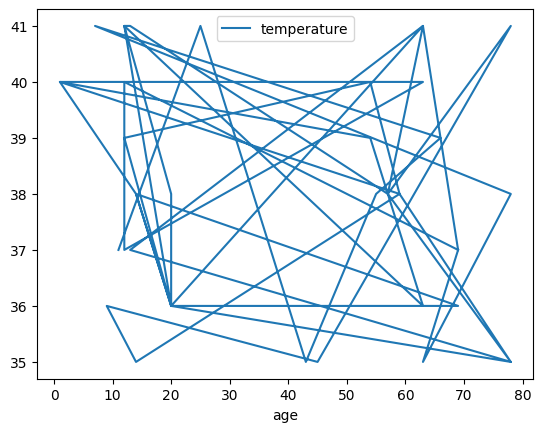

In [30]:
data.plot("age", "temperature")

Im combination with a column name, we can also only plot one column. Here, matplotlib assumes that it is a sequence.

<Axes: >

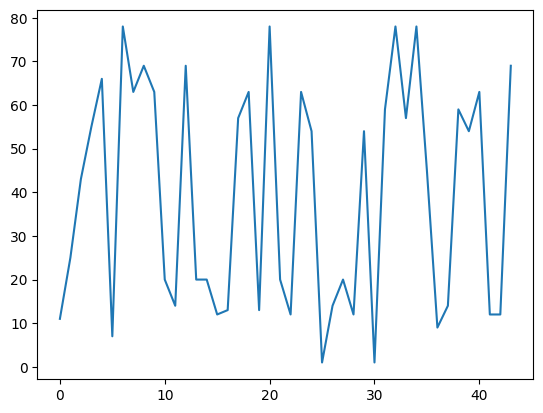

In [31]:
data.age.plot()

We can also reuse the groups that we created and plot the results based on these groups.

group
adult     Axes(0.125,0.11;0.775x0.77)
junior    Axes(0.125,0.11;0.775x0.77)
senior    Axes(0.125,0.11;0.775x0.77)
dtype: object

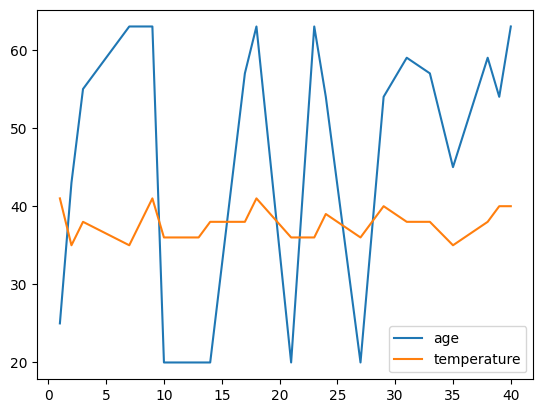

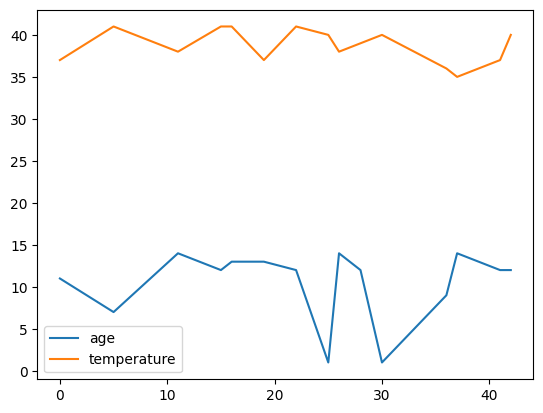

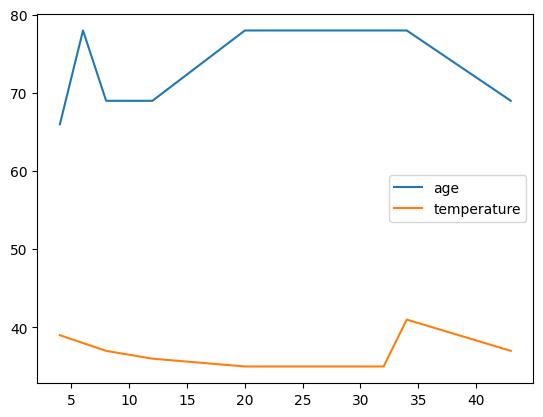

In [32]:
age_groups.plot()

group
adult     Axes(0.125,0.11;0.775x0.77)
junior    Axes(0.125,0.11;0.775x0.77)
senior    Axes(0.125,0.11;0.775x0.77)
Name: temperature, dtype: object

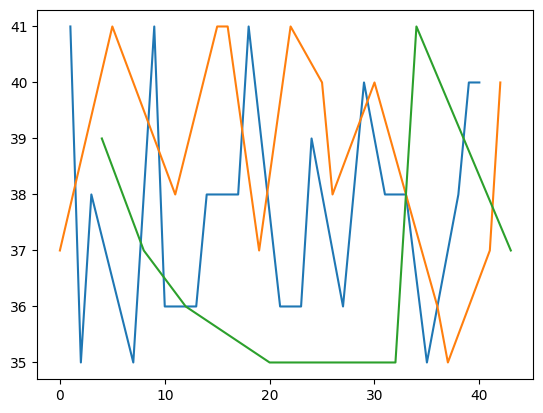

In [33]:
age_groups.temperature.plot()

There are also other forms of plots that can be created using matplotlib. You can find an overview in the matplotlib documentation [here](https://matplotlib.org/stable/plot_types/index.html).

#### Plot customization

To further customize a plot, you can adjust the labels on the x-axis and y-axis using `xlabel()` and `ylabel()`. This allows you to provide more context and clarity to your visualizations.

Text(0.5, 1.0, 'Temperature correlates with age?')

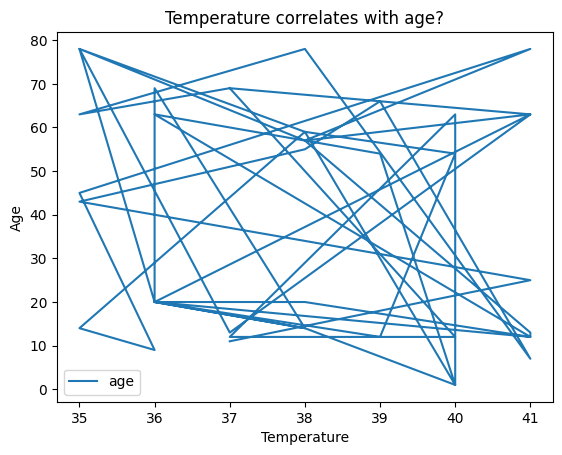

In [34]:
data.plot('temperature', 'age')
plt.xlabel('Temperature')
plt.ylabel('Age')

# We can add a title as well
plt.title('Temperature correlates with age?')

To better represent your data, you can vary the type of plot used. 

For example, you might want to choose a scatter plot for visualizing relationships between variables.

(0.0, 100.0)

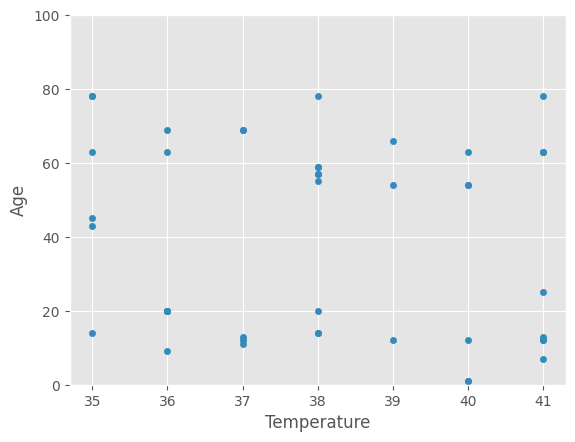

In [35]:
plt.style.use('ggplot')
data.plot('temperature', 'age', kind = 'scatter')
plt.xlabel('Temperature')
plt.ylabel('Age')

# We can adapt the limitations using xlim() and ylim()
plt.ylim(0,100)

We can also annotate the plot, for example, with an arrow.

Text(40, 90, 'max age: 78')

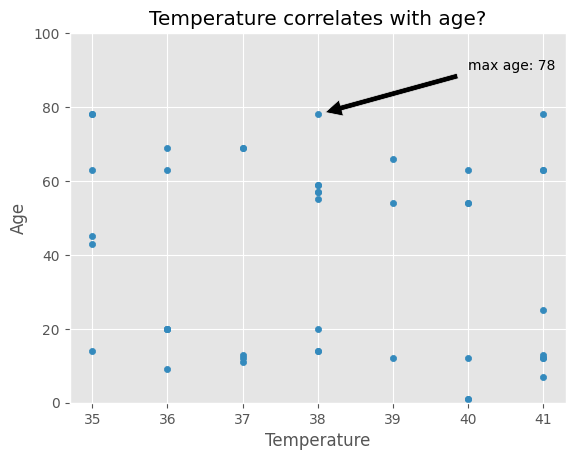

In [36]:
data.plot('temperature', 'age', kind = 'scatter')
plt.xlabel('Temperature')
plt.ylabel('Age')
plt.title('Temperature correlates with age?')
plt.ylim(0,100)

# Arrow
plt.annotate('max age: ' + str(data.age.max()), xy=(38, data.age.max()), xytext=(40, 90),
             arrowprops=dict(facecolor='black', shrink=0.05),)

In total, we can choose between 11 kinds of plots in pandas:

- ‘line’ : line plot (default)
- ‘bar’ : vertical bar plot
- ‘barh’ : horizontal bar plot
- ‘hist’ : histogram
- ‘box’ : boxplot
- ‘kde’ : Kernel Density Estimation plot
- ‘density’ : same as ‘kde’
- ‘area’ : area plot
- ‘pie’ : pie plot
- ‘scatter’ : scatter plot (DataFrame only)
- ‘hexbin’ : hexbin plot (DataFrame only)

Let us try the pie plot, but this time with the frequencies of the age groups.

Text(0, 0.5, '')

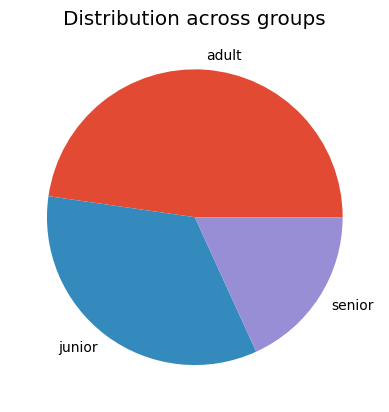

In [37]:
plt.style.use('ggplot')
data.group.value_counts().plot(kind = 'pie')
plt.title('Distribution across groups')
plt.ylabel('')

Of course, there are many more use cases and ways to create plots. The right plot really depends on your data. In general, I recommend just trying it out!

Pandas provides users with a good documentation of the possibilities [here](https://pandas.pydata.org/docs/user_guide/visualization.html).

### Saving a plot

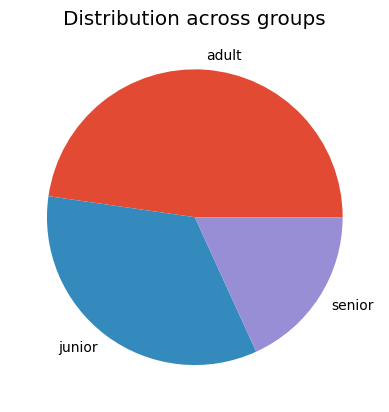

In [38]:
# Note: the plt.savefig() must be in the same Notebook cell as the creation of the plot
plt.style.use('ggplot')
data.group.value_counts().plot(kind = 'pie')
plt.title('Distribution across groups')
plt.ylabel('')

# Save plot as pieplot_png
plt.savefig('output/pie_plot.png')

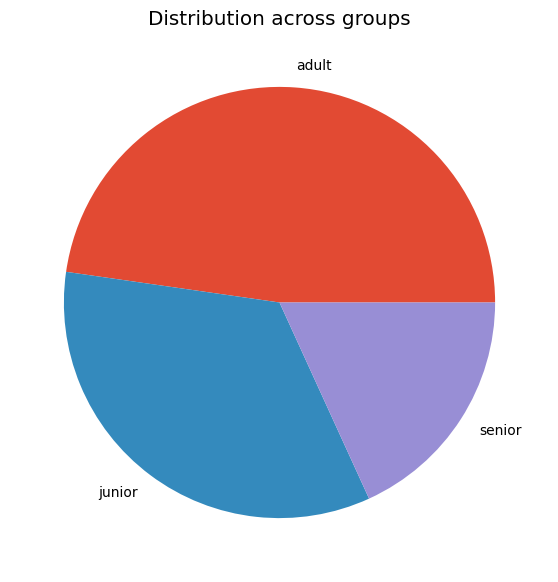

In [39]:
# Adjust the resolution, size and style
data.group.value_counts().plot(kind = 'pie', title = 'Distribution across groups', ylabel = '', figsize=(7, 7))
plt.savefig('output/pie_plot2.png', dpi=200, bbox_inches='tight')
# bbox is a mutable bounding box. bbox_inches refers to bbox in inches. Only the given portion of the figure is saved. If 'tight', it tries to figure out the tight bbox of the figure. 
# dpi stands for dots per inch
# figsize takes the dimensions in inches

### Programming Style 

Maintaining a consistent coding style significantly aids others and ourselves in reading and comprehending code more effectively. Code is read far more frequently than it is written. Python established a standard style through one of its early Python Enhancement Proposals (PEP), specifically [PEP8](https://peps.python.org/pep-0008/).

Here are some aspects that they write about comments:

- Comments that contradict the code are worse than no comments. Always make a priority of keeping the comments up-to-date when the code changes!
- Comments should be complete sentences. The first word should be capitalized, unless it is an identifier that begins with a lower case letter (never alter the case of identifiers!).
- Ensure that your comments are clear and easily understandable to other speakers of the language you are writing in
- Python coders from non-English speaking countries: please write your comments in English, unless you are 120% sure that the code will never be read by people who don’t speak your language.

Doc strings even have their own conventions ([PEP257](https://peps.python.org/pep-0257/)).


In [40]:
# This is a good documented code:

import pandas as pd

def get_headers(file_location):
    """ Function reads csv file and prints headers
    Parameters
    ----------
    file_location : str
        The file location of the csv file

    Returns
    -------
    list
        a list of strings used that are the headers"""
    # Process input
    data = pd.read_csv(file_location)
    headers = data.columns.to_list()
    # Create output
    print("\t".join(headers))
    return headers

get_headers("static/names_age_location.csv")

name	age	location


['name', 'age', 'location']

In [41]:
# This is not easily understandable:
import pandas as pd

def hd(f):
    df = pd.read_csv(f)
    print("\t".join(list(df.columns.values)))
    return list(df.columns.values)

hd("static/names_age_location.csv")

name	age	location


['name', 'age', 'location']

### FAIR practices

To make your research software as reproducible as possible and to give you more confidence in publishing your code alongside your data, it is recommended to follow open science practices.

To be precise, I recommend you to take FAIR into account when starting to work on your own Research Software:\
**F** (Findable)\
**A** (Accessible)\
**I** (Interoperable)\
**R** (Reusable)


#### Findable

You can make your code findable by uploading it to a public repository such as GitHub and writing a good README.
- Git (GitHub) can be used to version your code. A programming café on how to use Git for versioning your software will be held soon.
- A README file helps inform others on how to use your code. You can find more information on how to create a README. [here](https://www.makeareadme.com).

#### Accessible
You can make your code accessible by using open formats (Python is already a good choice!) and providing clear installation and usage instructions.


#### Interoperable

You can make your code interoperable by avoiding hardcoding (i.e., use functions and refrain from using direct file paths within the code) and by documenting dependencies on other packages (e.g., random or pandas).

#### Reusable

You can make your code reusable by providing usage examples and writing modular, well-documented code.

## How to download your files

To download all the files that you created and worked on during this course, you can use the download option of jupyter. For that, click "File" and then "Download" (see screenshot).

![jupyter](figures/Screenshot.png)

## How to run jupyter notebook locally

As an EUR employee the easiest way to run a jupyter notebook locally is via [Anaconda](https://liveeur.sharepoint.com/sites/EUR-Intune-Devices/Lists/Software%20catalog/DispForm.aspx?ID=12&e=LhYVTW). Here, you have the option to start a jupyter notebook.

![anaconda](figures/Screenshot_Anaconda.png)

Once jupyter launches, a webpage will open on your PC. Using the file system that you see there, you can look for your downloaded files and open them.

## Next steps

Although we have been learning Python using Jupyter Lab, in daily practice, you might prefer using an IDE (Integrated Development Environment) like PyCharm or Visual Studio Code. These tools help you to write and use research software efficiently.

## Programming Café

To keep on learning Python, please consider coming to the monthly [programming cafés](https://eur-nl.github.io/programming-cafe/) that we host at EUR.

![Programming Café](figures/logo_with_text.jpg)

## Helpful/Interesting links for the future

### Learn more Python
- [Plotting and Programming in Python course (Software Carpentries)](https://swcarpentry.github.io/python-novice-gapminder/)
- [The Hitchhiker’s Guide to Python!](https://docs.python-guide.org)
- [Kaggle courses](https://www.kaggle.com/learn)

### Learn computational thinking
- [Computational Thinking for Social Scientists](https://jaeyk.github.io/comp_thinking_social_science/)

### Learn more about programming practices
- [Five recommendations for FAIR software](https://fair-software.nl)
- [How to FAIRify Your Research Software? A Practical Overview](https://www.rug.nl/digital-competence-centre/research-data/content-fragments-data-management/guide-on-fair-software-ug-dcc-pdf-v1-0-2.pdf)
- [Self-assessment for FAIR research software](https://fairsoftwarechecklist.net/v0.2/)
- [The Turing Way - Guide on reproducible research](https://book.the-turing-way.org/reproducible-research/reproducible-research/)
- [Good enough practices in scientific computing](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1005510)
- [Research Software Development Guide by the eScience Center](https://guide.esciencecenter.nl/#/)

